<a href="https://colab.research.google.com/github/mohamed3611/brain-tumor-cnn/blob/main/brain_tumor_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_dir = "/kaggle/input/brain-tumor-mri-dataset/Training"

train_datagen = ImageDataGenerator(rescale=1./255)

train_loader = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

print(f"Number of training images: {train_loader.samples}")
print(f"Classes: {list(train_loader.class_indices.keys())}")


Found 5712 images belonging to 4 classes.
Number of training images: 5712
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
test_dir = "/kaggle/input/brain-tumor-mri-dataset/Testing"

test_datagen = ImageDataGenerator(rescale=1./255)

test_loader = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"Number of test images: {test_loader.samples}")
print(f"Classes: {list(test_loader.class_indices.keys())}")


Found 1311 images belonging to 4 classes.
Number of test images: 1311
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 8
train_dir = "/kaggle/input/brain-tumor-mri-dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_loader = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

valid_loader = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"Number of images in training dataset: {train_loader.samples}")
print(f"Number of images in validation dataset: {valid_loader.samples}")
print(f"Classes: {list(train_loader.class_indices.keys())}")


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Number of images in training dataset: 5619
Number of images in validation dataset: 1404
Classes: ['Testing', 'Training']


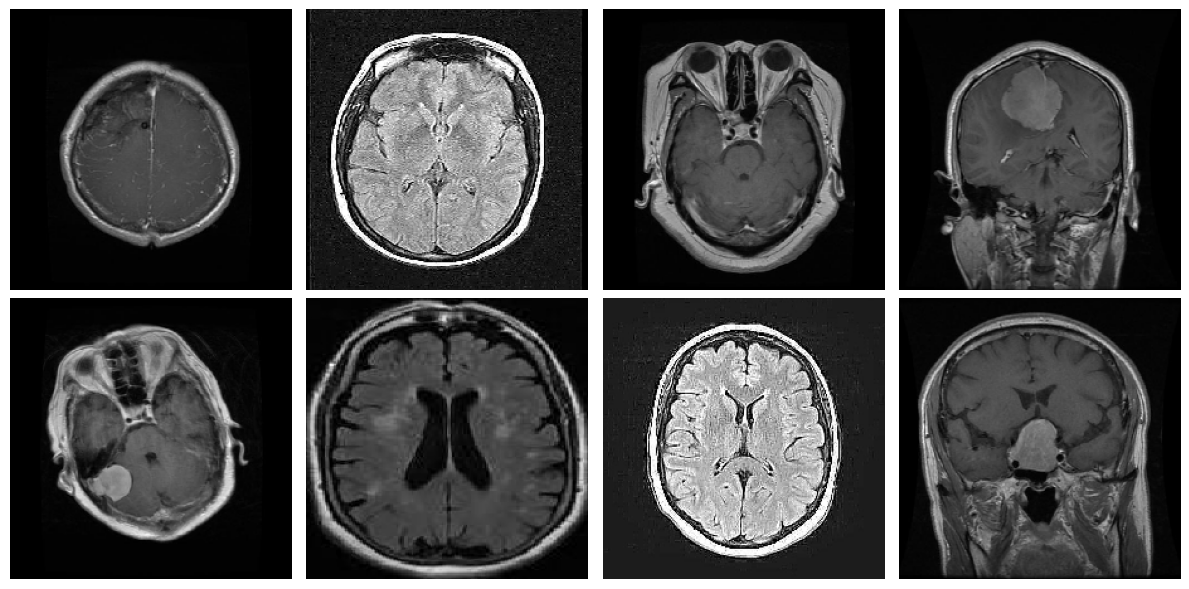

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow_batch(images):
    plt.figure(figsize=(12, 6))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

images, labels = next(train_loader)
imshow_batch(images)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adamax

img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = 4
model = Sequential(name="my_model")

model.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=img_shape))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(class_count, activation="softmax"))

model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,154,180 (80.70 MB)

 Trainable params: 21,154,180 (80.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_path = '/kaggle/input/brain-tumor-mri-dataset/Training'
valid_path = '/kaggle/input/brain-tumor-mri-dataset/Testing'

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_gen = valid_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1, 2, 3]),  # عدل حسب ترقيم الكلاسات
    y=train_gen.classes
)

# استخدمها في model.fit:
history_with_weights=model.fit(
    train_gen,
    epochs=15,
    validation_data=valid_gen,
    class_weight=dict(enumerate(class_weights))
)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 166s 713ms/step - accuracy: 0.2869 - loss: 1.4022 - val_accuracy: 0.5942 - val_loss: 1.0418
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 481ms/step - accuracy: 0.7043 - loss: 0.7628 - val_accuracy: 0.7391 - val_loss: 0.6410
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 482ms/step - accuracy: 0.8213 - loss: 0.4736 - val_accuracy: 0.7605 - val_loss: 0.5612
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 482ms/step - accuracy: 0.8580 - loss: 0.3815 - val_accuracy: 0.7521 - val_loss: 0.6105
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 482ms/step - accuracy: 0.8727 - loss: 0.3347 - val_accuracy: 0.8474 - val_loss: 0.3803
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 483ms/step - accuracy: 0.9000 - loss: 0.2882 - val_accuracy: 0.8772 - val_loss: 0.3150
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 483ms/step - accuracy: 0.9214 - loss: 0.2267 - val_accuracy: 0.8871 - val_loss: 0.2749
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 86s 483ms/step - accuracy: 0.9284 - loss: 0.1986 - va

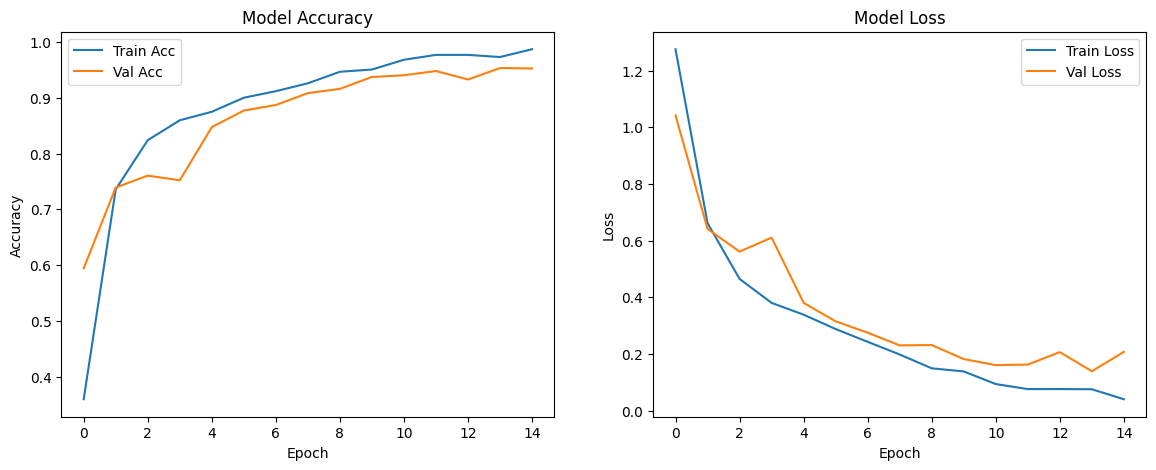

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_with_weights.history['accuracy'], label='Train Acc')
plt.plot(history_with_weights.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_with_weights.history['loss'], label='Train Loss')
plt.plot(history_with_weights.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.9196 - loss: 0.3369


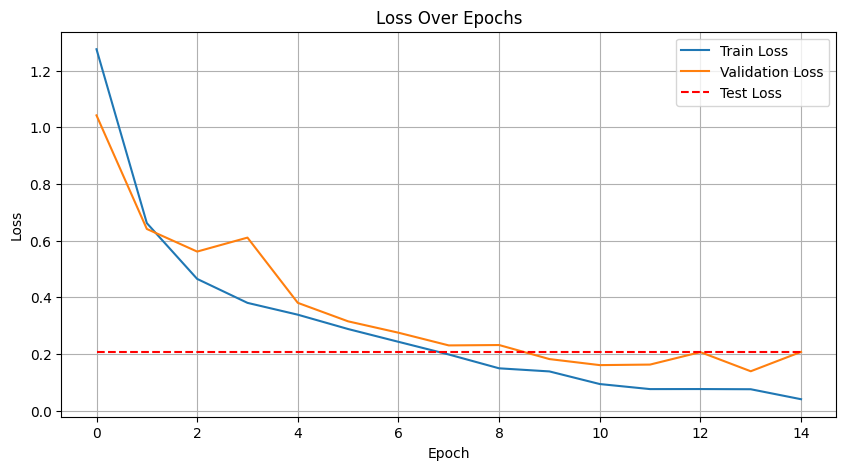

In [ ]:
import matplotlib.pyplot as plt

# استخراج القيم من history
train_loss = history_with_weights.history['loss']
val_loss =history_with_weights.history['val_loss']
epochs = range(len(train_loss))

# حساب test loss
test_loss, test_acc = model.evaluate(valid_gen)  # Use the correct valid_gen
test_loss_line = [test_loss] * len(epochs)

# الرسم
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.plot(epochs, test_loss_line, label='Test Loss', linestyle='--', color='red')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

valid_gen.reset()
pred_probs = model.predict(valid_gen, steps=len(valid_gen), verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = valid_gen.classes

class_labels = list(valid_gen.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step
              precision    recall  f1-score   support

      glioma       0.98      0.86      0.91       300
  meningioma       0.87      0.96      0.91       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.99      0.98      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.95      0.95      1311

